In [26]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [27]:
#####
#
# TODO: Implement a function that returns the first order derivatives of c 
# (the concentration vector (c_a(t), c_b(t), c_c(t))).
# The function takes as input the concentration vector c,
# the time vector t and rate constants k1, k2 and k3.
#
#####
def get_ode_derivatives(c, t, k1, k2, k3):
    c_a, c_b, c_c = c
    M=np.array([[1,-1,0],[-1,0,1],[0,1,-1]])
    K=np.array([[k1*c_a*c_b],[k2*c_c*c_a],[k3*c_b*c_c]])
    dcdt = np.dot(M,K).flatten()
    
    return dcdt


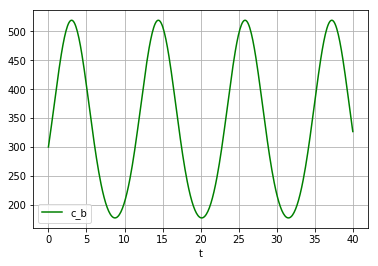

In [28]:

k1 = 0.001
k2 = 0.001
k3 = 0.001

t0 = 0
tn = 40
tsteps = 400




#TODO: Write code that numerically solves the ODE using scipy.integrate.odeint.
#      odeint expects your derivative-function implemented in the cell above as input,
#      along with the initial condititions, rate constants, and a vector of time.
#      For a brief tutorial, look at:
#      https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint
#TODO: Write code that plots the solution curves of the ODE.
#      Use the matplotlib.pyplot library for this.

c0_a = 200
c0_b = 300
c0_c = 500

c0=[c0_a, c0_b, c0_c]
t = np.linspace(t0, tn, tsteps)
sol = odeint(get_ode_derivatives, c0, t, args=(k1, k2, k3))


plt.plot(t, sol[:, 1], 'g', label='c_b')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()



#TODO: Write code that numerically solves the ODE using scipy.integrate.odeint.
#      odeint expects your derivative-function implemented in the cell above as input,
#      along with the initial condititions, rate constants, and a vector of time.
#      For a brief tutorial, look at:
#      https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint
#TODO: Write code that plots the solution curves of the ODE.
#      Use the matplotlib.pyplot library for this.


In [24]:
#Gillespie simulation skeleton


n_iters = 10

#TODO: Initialize some structure to hold the gillespie simulation curves (the results), for later plotting
plot = []
#Reaction constants

k1 = 0.001
k2 = 0.001
k3 = 0.001



for n_iter in range(0, n_iters) :
    time = []
    A = []
    B = []
    C = []
    print('Iteration ' + str(n_iter))
    
    t = 0
    t_max = 40

    #Initial molecule counts for each species
    c_a = 200
    c_b = 300
    c_c = 500

    while t < t_max :
        
        #TODO: Calculate the value of the kinetics of each reaction
   
        rxn1 = c_a * c_b * k1
        rxn2 = c_c * c_a * k2
        rxn3 = c_c * c_b * k3
        
        #TODO: Normalize each kinetics value by the sum of kinetics values
        rxntot = rxn1+rxn2+rxn3
        prxn1 = rxn1 / rxntot
        prxn2 = rxn2 / rxntot
        prxn3 = rxn3 / rxntot
        
        #TODO: Randomly sample one of the reactions according to the normalized kinetics values (i.e. their probabilities)
        #TIP: Use numpy.random.choice
        nxt = np.random.choice(['rxn1', 'rxn2', 'rxn3'], 1, p=[prxn1,prxn2,prxn3])
        #TODO: Randomly sample the small increase in time, according to an exponential distribution
        #TIP: Use numpy.random.exponential
        
        dt = np.random.exponential(scale=1/rxntot)
        
        #TODO: Update molecule counts (the result of the randomly chosen reaction)
        if nxt == "rxn1":
            c_a += 1
            c_b -= 1
        if nxt == "rxn2":
            c_c += 1
            c_a -= 1
        if nxt == "rxn3":
            c_b += 1
            c_c -= 1
    
        #TODO: Update time t according to the randomly samples time increase
        t += dt
        #TODO: Store the current values of time and molecule counts (for later plotting)
        time.append(t)
        A.append(c_a)
        B.append(c_b)
        C.append(c_c)
    #TODO: Store the completed gillespie iteration as one simulation curve (for later plotting)
    plot.append([time,A,B,C])
    print ("DONE")

Iteration 0
DONE
Iteration 1
DONE
Iteration 2
DONE
Iteration 3
DONE
Iteration 4
DONE
Iteration 5
DONE
Iteration 6
DONE
Iteration 7
DONE
Iteration 8
DONE
Iteration 9
DONE


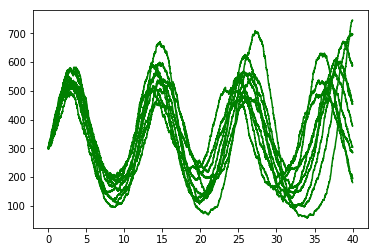

In [25]:
for n in plot:
    plt.plot(n[0],n[2], 'g')
plt.show()

In [36]:
#Gillespie simulation skeleton


n_iters = 10

#TODO: Initialize some structure to hold the gillespie simulation curves (the results), for later plotting
plot = []
#Reaction constants

k1 = 0.00002
k2 = 0.00002
k3 = 0.00002




for n_iter in range(0, n_iters) :
    time = []
    A = []
    B = []
    C = []
    print('Iteration ' + str(n_iter))
    
    t = 0
    t_max = 40

    #Initial molecule counts for each species
    c_a = 10000
    c_b = 15000
    c_c = 25000

    while t < t_max :
        
        #TODO: Calculate the value of the kinetics of each reaction
      
        rxn1 = c_a * c_b * k1
        rxn2 = c_c * c_a * k2
        rxn3 = c_c * c_b * k3
        
        #TODO: Normalize each kinetics value by the sum of kinetics values
        rxntot = rxn1+rxn2+rxn3
        prxn1 = rxn1 / rxntot
        prxn2 = rxn2 / rxntot
        prxn3 = rxn3 / rxntot
        
        #TODO: Randomly sample one of the reactions according to the normalized kinetics values (i.e. their probabilities)
        #TIP: Use numpy.random.choice
        nxt = np.random.choice(['rxn1', 'rxn2', 'rxn3'], 1, p=[prxn1,prxn2,prxn3])
        #TODO: Randomly sample the small increase in time, according to an exponential distribution
        #TIP: Use numpy.random.exponential
        
        dt = np.random.exponential(scale=1/rxntot)
        
        #TODO: Update molecule counts (the result of the randomly chosen reaction)
        if nxt == "rxn1":
            c_a += 1
            c_b -= 1
        if nxt == "rxn2":
            c_c += 1
            c_a -= 1
        if nxt == "rxn3":
            c_b += 1
            c_c -= 1
    
        #TODO: Update time t according to the randomly samples time increase
        t += dt
        #TODO: Store the current values of time and molecule counts (for later plotting)
        time.append(t)
        A.append(c_a)
        B.append(c_b)
        C.append(c_c)
    #TODO: Store the completed gillespie iteration as one simulation curve (for later plotting)
    plot.append([time,A,B,C])
    print ("DONE")

Iteration 0
DONE
Iteration 1
DONE
Iteration 2
DONE
Iteration 3
DONE
Iteration 4
DONE
Iteration 5
DONE
Iteration 6
DONE
Iteration 7
DONE
Iteration 8
DONE
Iteration 9
DONE


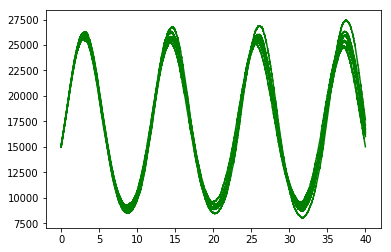

In [37]:
for n in plot:
    plt.plot(n[0],n[2], 'g')
plt.show()